## Online Job Posting -Text Mining

In [41]:
import os
os.getcwd()

'D:\\Case Studies & Final Projects\\6. Analyzing online Job Postings'

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [43]:
data = pd.read_csv('data_job_posts.csv')

In [44]:
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [45]:
# Get the basic info of DataFrame and perform programmatic assessment 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [46]:
# Display the entry counts for the Year column
data['JobRequirment'].value_counts()

- Participate in application design;\n- Provide necessary technical and design documentation;\n- Communicate effectively with local management and external team\nmembers;\n- Develop features according to technical specifications.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [47]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [48]:
data_clean = data.copy()

 editing non descriptive columns

In [49]:
data_clean = data_clean.rename(columns = {'ApplicationP':'ApplicationProcedure',
                                    'AboutC':'AboutCompany',
                                     'RequiredQual':'RequiredQualifications',
                                     'JobRequirment':'JobRequirement'})

In [50]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                   19001 non-null object
date                      19001 non-null object
Title                     18973 non-null object
Company                   18994 non-null object
AnnouncementCode          1208 non-null object
Term                      7676 non-null object
Eligibility               4930 non-null object
Audience                  640 non-null object
StartDate                 9675 non-null object
Duration                  10798 non-null object
Location                  18969 non-null object
JobDescription            15109 non-null object
JobRequirement            16479 non-null object
RequiredQualifications    18517 non-null object
Salary                    9622 non-null object
ApplicationProcedure      18941 non-null object
OpeningDate               18295 non-null object
Deadline                  18936 non-null object
Notes                     2211 non

In [51]:
data_clean[['jobpost','JobRequirement','IT','Year','Title']].tail()

,jobpost,JobRequirement,IT,Year,Title
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,- Work closely with product and business teams...,False,2015,Senior Creative UX/ UI Designer
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",- Establish and manage Category Management dev...,False,2015,Category Development Manager
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","- Develop, establish and maintain marketing st...",False,2015,Operational Marketing Manager
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,- Handle the project activites of the online s...,False,2015,Head of Online Sales Department
19000,"""Kamurj"" UCO CJSC\n\n\nTITLE: Lawyer in Legal...",- Properly provide internal legal services of ...,False,2015,Lawyer in Legal Department


In [59]:
X=data_clean.groupby(['Year'])[['IT']].sum()

In [60]:
X.head()

,IT
Year,
2004,145.0
2005,208.0
2006,225.0
2007,317.0
2008,334.0


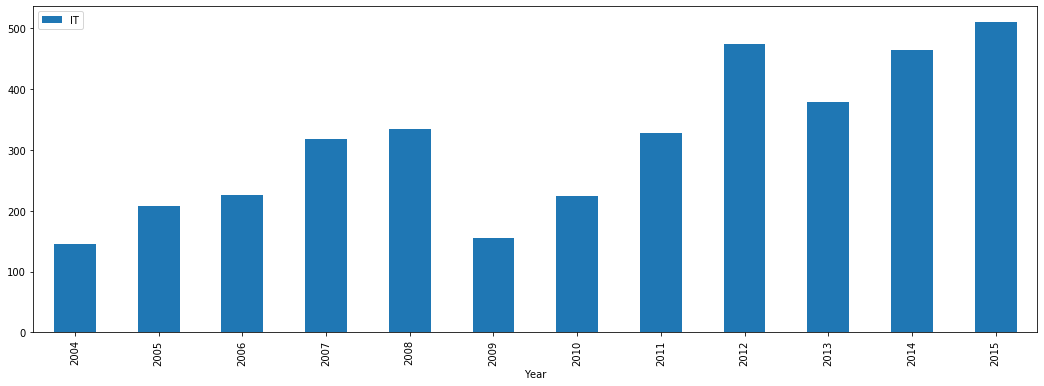

In [62]:
import matplotlib.pyplot as plt
# make the plots inline with the notebook
%matplotlib inline
X.plot.bar(figsize=(18,6))

plt.show()

The data shows in armenia  the  demand of IT  jobs are keep  increasing 

In [77]:
data_clean['JobDescription'].dropna(how='all',inplace=True)

In [81]:
Y=data_clean.groupby(['Year'])[['JobDescription']].count()

In [82]:
Y.head()

,JobDescription
Year,
2004,725
2005,791
2006,896
2007,1162
2008,1337


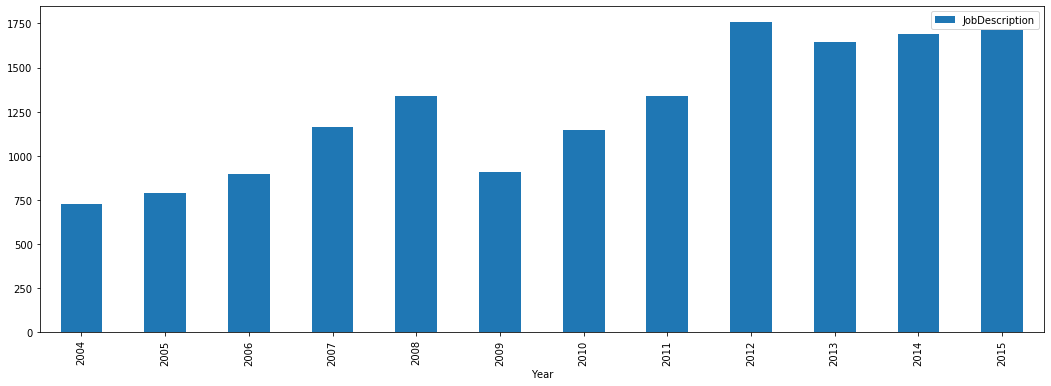

In [83]:
Y.plot.bar(figsize=(18,6))

plt.show()

## IT Job Classification

In [182]:
data_1 = data_clean[['JobDescription','IT']]

In [183]:
data_1.dropna(thresh=2)

,JobDescription,IT
0,AMERIA Investment Consulting Company is seekin...,False
2,Public outreach and strengthening of a growing...,False
3,The LEAD (Local Enhancement and Development fo...,False
5,Saleswoman will sell menswear and accessories.,False
6,The Armenian Branch Office of the Open Society...,False
9,The incumbent assists in coordinating INL-fund...,False
12,ISC seeks an experienced and creative Chief of...,False
13,Food Security Regional Cooperation and Stabili...,False
17,The United Nations Development Programme in Ar...,False
18,Driver/ Logistics Assistant is a full-time nat...,False


In [184]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(data_1['IT'])
variable = lab_enc.transform(data_1['IT'])
data_1['IT'] = variable
print(data_1['IT'])

0        0
1        0
2        0
3        0
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
18971    0
18972    1
18973    1
18974    0
18975    0
18976    0
18977    0
18978    1
18979    0
18980    1
18981    0
18982    0
18983    0
18984    0
18985    0
18986    0
18987    1
18988    1
18989    0
18990    1
18991    1
18992    1
18993    0
18994    0
18995    0
18996    0
18997    0
18998    0
18999    0
19000    0
Name: IT, Length: 19001, dtype: int64


D:\DSP\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [185]:
data_1.IT.value_counts()/sum(data_1.IT.value_counts()) * 100

0    80.216831
1    19.783169
Name: IT, dtype: float64

In [186]:
# define X and y
X = data_1.JobDescription
y = data_1.IT

In [187]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(15200,)
(3801,)
(3801,)
(15200,)


In [188]:
X_train.head()

535                                                    NaN
5792     The main responsibility of the Executive Secre...
4403                                                   NaN
14516                                                  NaN
3095     The Internal Auditor will report to the Head o...
Name: JobDescription, dtype: object

In [189]:
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [190]:
x = v.fit_transform((X_train).values.astype('U'))

### Vectorizing Description data

In [191]:
from wordcloud import WordCloud ,STOPWORDS

In [192]:
import re
def pre_process_text(x):
    x = x.strip()
    x = re.sub(r' +', ' ', x)
    x = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", x)
    return(x)

In [193]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [194]:
# instantiate the vectorizer
#vect = TfidfVectorizer()
vect = TfidfVectorizer(analyzer='word',lowercase=True, preprocessor=pre_process_text, ngram_range=(1,2), 
                       max_features=1000, max_df=1.0, min_df=10, stop_words=STOPWORDS)

In [198]:
# learn training data vocabulary, then create document-term matrix
X_train_dtm = vect.fit_transform((X_train).values.astype('U'))

In [199]:


X_train_dtm

<15200x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 232240 stored elements in Compressed Sparse Row format>

## Examining the tokens  and  their counts

In [200]:
# store token names
X_train_tokens = vect.get_feature_names()

In [201]:
X_train_tokens = vect.get_feature_names()

In [202]:
print(X_train_tokens[:50])

['ADP', 'AM', 'Accountant', 'Accountant will', 'Accounting', 'Administration', 'Administrative', 'Administrative Assistant', 'Administrator', 'Advisor', 'Agency', 'Agent', 'Analyst', 'Analyst will', 'Area', 'Area Development', 'Armenia', 'Armenia CJSC', 'Armenia The', 'Armenia looking', 'Armenia seeking', 'Armenian', 'Armenias', 'As', 'Assistant', 'Assistant will', 'Assurance', 'AtTask', 'Audit', 'Bank', 'Bank Armenia', 'Banks', 'Board', 'Branch', 'Business', 'CARD', 'CEO', 'CJSC', 'CJSC looking', 'CJSC seeking', 'Care', 'Cascade', 'Caucasus', 'Center', 'Chief', 'Chief Accountant', 'Chief Party', 'Client', 'Commercial', 'Communications']


In [203]:
# view X_train_dtm as a dense matrix
X_train_dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [204]:
import pandas as pd
dtm = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

In [205]:
dtm.head()

,ADP,AM,Accountant,Accountant will,Accounting,Administration,Administrative,Administrative Assistant,Administrator,Advisor,...,will working,willing,within,work,work closely,work direct,working,works,writing,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Building a Naive Bayes model

We will use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [215]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
nb = MultinomialNB()
#nb = GaussianNB()
nb.fit(dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [216]:
vect = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X_test_dtm = vect.fit_transform((X_test).values.astype('U'))

In [217]:
X_test_dtm

<3801x6665 sparse matrix of type '<class 'numpy.float64'>'
	with 90868 stored elements in Compressed Sparse Row format>

In [218]:
# make class predictions for X_test_dtm
y_pred_class_train = nb.predict(dtm)
y_pred_class = nb.predict(X_test_dtm.toarray())

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 6665)